	•	H₀ (Null Hypothesis): Prices decrease steadily after release, and collaborations have no significant impact on delaying the price drop.
	•	H₁ (Alternative Hypothesis): Prices decrease steadily after release, but collaborations delay the price drop due to sustained hype.

#### Data Preparation

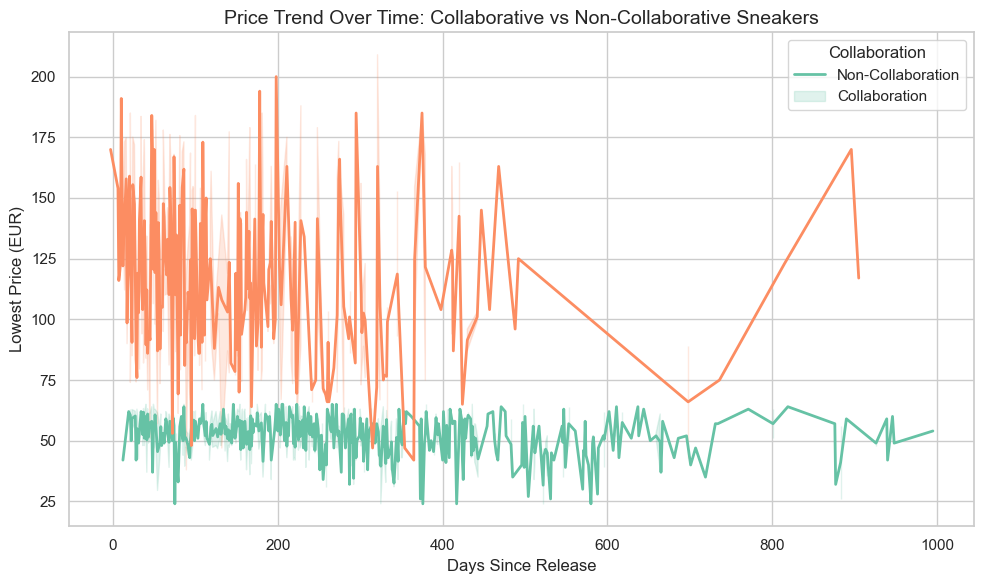

In [14]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import necessary libraries
import pandas as pd
import numpy as np

df = pd.read_csv('../more_data.csv')
# Set up the plot style
sns.set(style="whitegrid")

# Create the plot to visualize the price trends
plt.figure(figsize=(10, 6))

# Plot price trend for collaborative vs non-collaborative sneakers
sns.lineplot(data=df, x='days_since_release', y='lowest_price_eur', hue='collaboration', 
             palette='Set2', linewidth=2)

# Add plot title and labels
plt.title('Price Trend Over Time: Collaborative vs Non-Collaborative Sneakers', fontsize=14)
plt.xlabel('Days Since Release', fontsize=12)
plt.ylabel('Lowest Price (EUR)', fontsize=12)
plt.legend(title='Collaboration', labels=['Non-Collaboration', 'Collaboration'])

# Show the plot
plt.tight_layout()
plt.show()

#### Exploratory Data Analysis

In [6]:
from scipy.stats import ttest_ind

# Split the data into two groups: collaborative and non-collaborative sneakers
collaboration_group = df[df['collaboration'] == 1]['lowest_price_eur']
non_collaboration_group = df[df['collaboration'] == 0]['lowest_price_eur']

# Perform a t-test to compare the price distributions between the two groups
t_stat, p_value = ttest_ind(collaboration_group, non_collaboration_group)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value to determine statistical significance
if p_value < 0.05:
    print("There is a significant difference between the price trends of collaborative and non-collaborative sneakers.")
else:
    print("No significant difference in the price trends.")

T-statistic: 54.9683034230847
P-value: 0.0
There is a significant difference between the price trends of collaborative and non-collaborative sneakers.


In [12]:
# Import necessary libraries for models and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create interaction term between days_since_release and is_collaboration
df['interaction'] = df['days_since_release'] * df['collaboration']

# Define the independent variables (features) and the dependent variable (target)
X = df[['days_since_release', 'collaboration', 'interaction']]
y = df['lowest_price_eur']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Loop over models, train, predict, and evaluate RMSE
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print the RMSE for each model
    print(f"{name} RMSE: {rmse}")
    print(f"{name} R2 Score: {r2}")


Linear Regression RMSE: 26.433596316648288
Linear Regression R2 Score: 0.58046645601325
Random Forest RMSE: 27.140646914834846
Random Forest R2 Score: 0.5577227766980459
XGBoost RMSE: 27.487131820831863
XGBoost R2 Score: 0.5463582277297974
